# Importing libraries


In [85]:
# Importing libraries

import pandas as pd
import numpy as np
import requests
import json
import os, glob
import re
from datetime import datetime
from pathlib import Path
import glob
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
# setting path
path= r'C:\Users\faisa\Desktop\Data analysis\Python Specialization\Achievement 2'

In [87]:
df = pd.read_csv("C:/Users/faisa/Desktop/Data analysis/Python Specialization/Achievement 2/02 Data/Updated Data/updated_df_1.csv", index_col=False) 

In [88]:
df.head()

,Unnamed: 0.1,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,temperature
0,0,0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,-2.3
1,1,1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-28,0.1
2,2,2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-10,1.6
3,3,3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,-2.3
4,4,4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-13,4.0


In [89]:
# dropping unnamed:0.1 and unnamed:0 columns
# dropping column
df.drop(columns = {'Unnamed: 0', 'Unnamed: 0.1'}, inplace = True)

In [90]:
# rename column
df = df.rename(columns={'member_casual': 'user_type'})

In [91]:
df['date'] = pd.to_datetime(df['date'])

## 2. setting global theme

In [92]:
sns.set_theme(style="whitegrid", palette="muted")

## 3. Top 20 starting stations

C:\Users\faisa\AppData\Local\Temp\ipykernel_18820\4291996172.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_stations, x="count", y="start_station_name", palette="viridis")


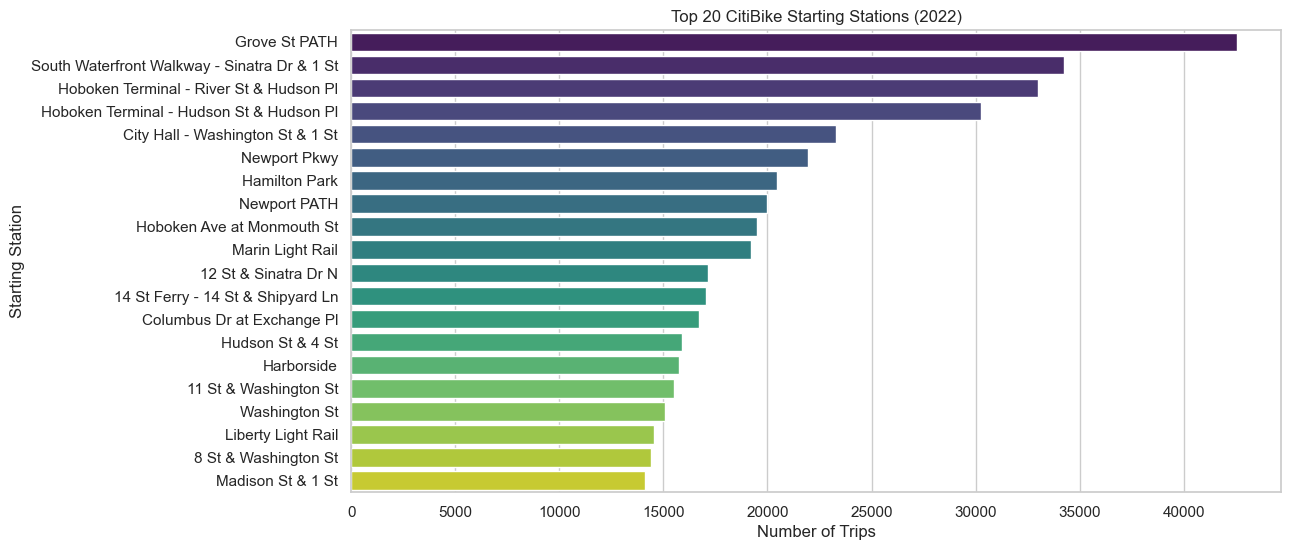

In [93]:
# Get the top 20 starting stations
top_stations = df["start_station_name"].value_counts().head(20).reset_index()
top_stations.columns = ["start_station_name", "count"]

plt.figure(figsize=(12,6))
sns.barplot(data=top_stations, x="count", y="start_station_name", palette="viridis")

plt.title("Top 20 CitiBike Starting Stations (2022)")
plt.xlabel("Number of Trips")
plt.ylabel("Starting Station")
plt.show()

## 4. Dual axis bar chart

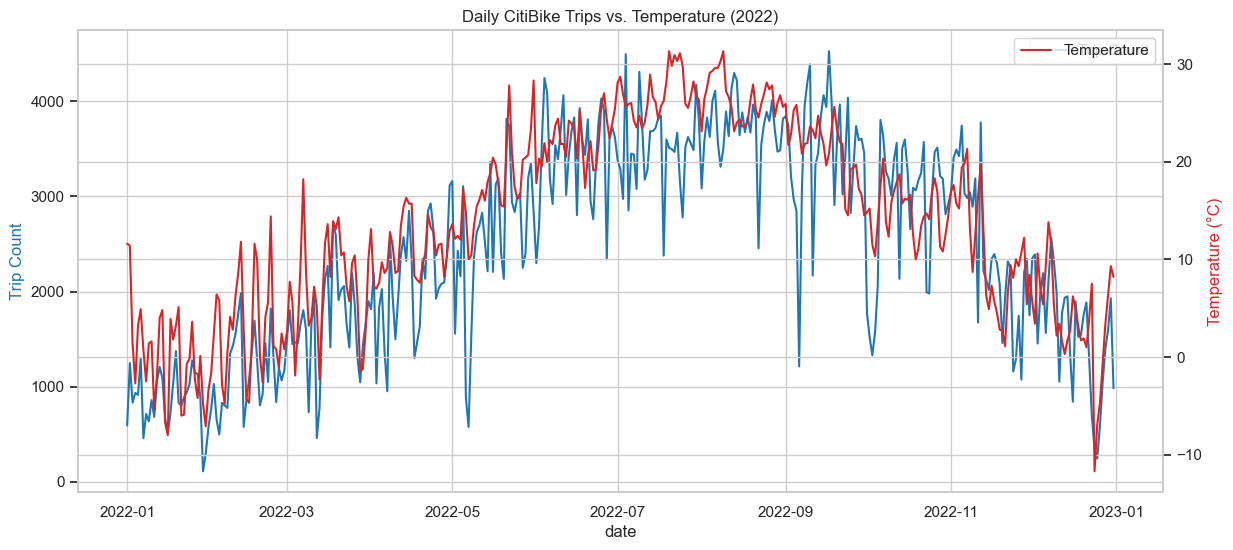

In [94]:
# Daily trips
daily_trips = df.groupby("date")["ride_id"].count().reset_index(name="trip_count")

# Daily average temperature
daily_temp = df.groupby("date")["temperature"].mean().reset_index(name="temperature")

# Merge
daily = pd.merge(daily_trips, daily_temp, on="date")

# Plot with two y-axes (using Matplotlib, Seaborn handles styling)
fig, ax1 = plt.subplots(figsize=(14,6))

sns.lineplot(data=daily, x="date", y="trip_count", ax=ax1, color="tab:blue", label="Trip Count")
ax1.set_ylabel("Trip Count", color="tab:blue")

ax2 = ax1.twinx()
sns.lineplot(data=daily, x="date", y="temperature", ax=ax2, color="tab:red", label="Temperature")
ax2.set_ylabel("Temperature (°C)", color="tab:red")

plt.title("Daily CitiBike Trips vs. Temperature (2022)")
plt.show()


## 5. Box plot of categorical variable

In [95]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'user_type', 'date', 'temperature'],
      dtype='object')

In [96]:
# Making started_at and ended_at are datetime
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

In [97]:
# Creating trip duration in minutes
df["trip_duration"] = (df["ended_at"] - df["started_at"]).dt.total_seconds() / 60

C:\Users\faisa\AppData\Local\Temp\ipykernel_18820\4747451.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="user_type", y="trip_duration", palette="muted")


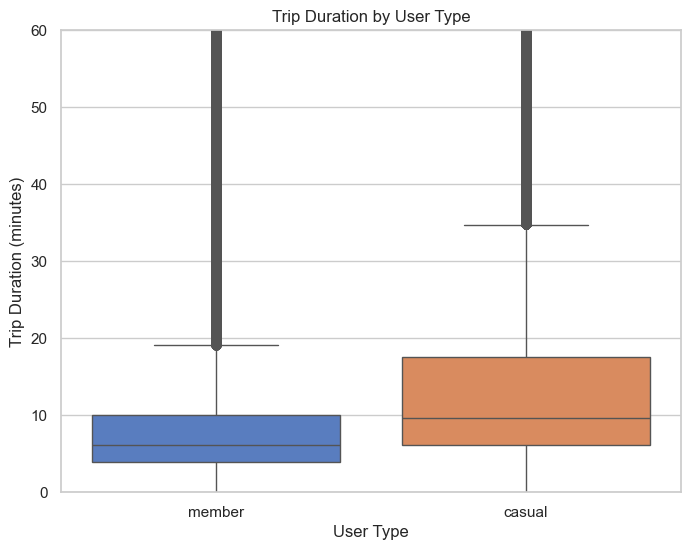

In [98]:
# Box plot
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="user_type", y="trip_duration", palette="muted")
plt.ylim(0, 60)  # limit to 60 min for readability (removes extreme outliers)
plt.title("Trip Duration by User Type")
plt.ylabel("Trip Duration (minutes)")
plt.xlabel("User Type")
plt.show()

**ANALYSIS:** The box plot shows that casual riders take longer trips compared to members. Members’ trips are shorter, whereas casual riders have a wider spread with more outliers suggesting that members primarily use CitiBike for regular short distance travels, whereas casual users tend to use it for leisure or fun purposes, which results in longer trip durations.

## 7. Facet grid

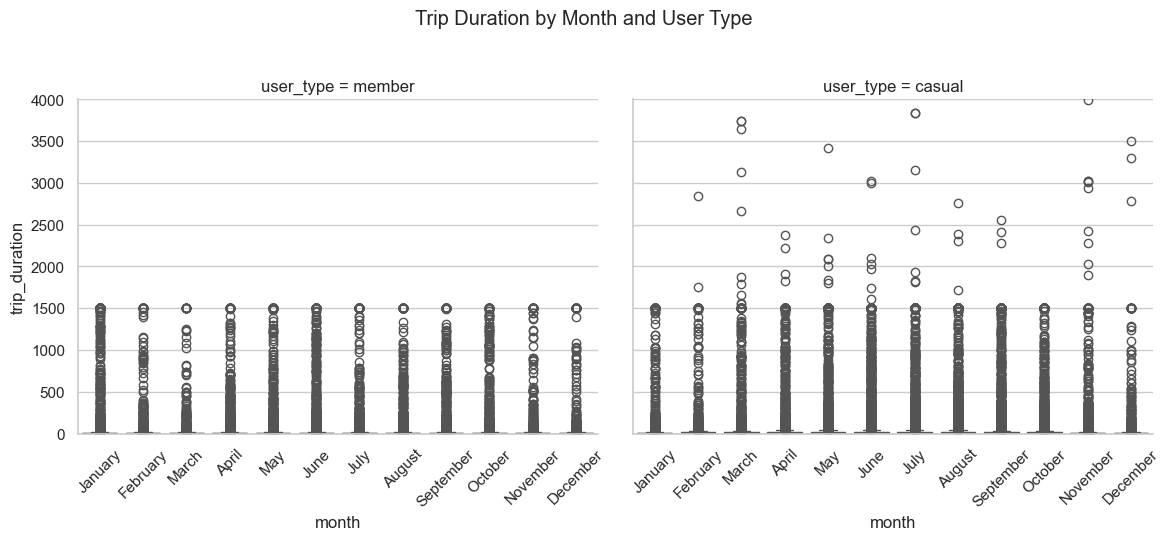

In [99]:
# Add month column
df["month"] = pd.to_datetime(df["date"]).dt.month_name()

# FacetGrid by user type
g = sns.FacetGrid(df, col="user_type", height=5, aspect=1.2)
g.map(sns.boxplot, "month", "trip_duration", order=[
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
])
for ax in g.axes.flat:
    ax.set_ylim(0, 4000)  # limit for readability
    ax.tick_params(axis="x", rotation=45)

plt.subplots_adjust(top=0.8)
g.fig.suptitle("Trip Duration by Month and User Type")
plt.show()


**Analysis**: The FacetGrid shows seasonal patterns in trip duration for different user types. Casual users have longer rides throughout the year with outliers, showing that their trip durations remain relatively stable across the year, giving us the idea of consistent behavior. This dual visualization makes it easier to compare seasonality effects across categories. Members' trip durations are pretty consistent having less rides in November and december and more during January, may, june and October.